# Imports 

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Magic commands

In [8]:
%config InlineBackend.figure_format ='retina'

In [7]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [3]:
!ls *.csv #check what files are available with .csv

basic_per_game_player_stats_2013_2018.csv
df_Basketball.csv


In [4]:
df = pd.read_csv('basic_per_game_player_stats_2013_2018.csv')
pd.set_option('display.max_columns', None)

In [5]:
df = df.rename(columns={'Unnamed: 6': 'Location','Unnamed: 8':'Result'})


In [6]:
# replace NAN values in Location column by 'vs' meaning home game
df.Location = df.Location.fillna('vs')

In [7]:
df

,Rk,Player,Age,Pos,Date,Tm,Location,Opp,Result,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,Devin Booker\bookede01,20-145,G,2017-03-24,PHO,@,BOS,L,1,45,21,40,0.525,17,29,0.586,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,70,54.5
1,2,Carmelo Anthony\anthoca01,29-240,F,2014-01-24,NYK,vs,CHA,W,1,39,23,35,0.657,17,24,0.708,6,11,0.545,10,10,1.000,1,12,13,0,0,0,0,1,62,50.6
2,3,LeBron James\jamesle01,29-063,F-G,2014-03-03,MIA,vs,CHA,W,1,41,22,33,0.667,14,23,0.609,8,10,0.800,9,12,0.750,3,4,7,4,0,0,2,2,61,48.8
3,4,Kobe Bryant\bryanko01,37-234,G-F,2016-04-13,LAL,vs,UTA,W,1,42,22,50,0.440,16,29,0.552,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,60,36.3
4,5,James Harden\hardeja01,28-157,G,2018-01-30,HOU,vs,ORL,W,1,46,19,30,0.633,14,16,0.875,5,14,0.357,17,18,0.944,2,8,10,11,4,1,5,2,60,56.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129916,129917,Ivica Zubac\zubaciv01,20-361,C,2018-03-14,LAL,@,GSW,L,0,6,0,2,0.000,0,2,0.000,0,0,NaN,0,2,0.000,0,3,3,0,0,0,0,0,0,-1.3
129917,129918,Ivica Zubac\zubaciv01,20-325,C,2018-02-06,LAL,vs,PHO,W,0,1,0,1,0.000,0,1,0.000,0,0,NaN,0,0,NaN,0,0,0,0,0,1,0,0,0,0.0
129918,129919,Ivica Zubac\zubaciv01,20-356,C,2018-03-09,LAL,@,DEN,L,0,9,0,4,0.000,0,4,0.000,0,0,NaN,0,0,NaN,2,3,5,0,0,1,0,2,0,-0.6
129919,129920,Ivica Zubac\zubaciv01,20-227,C,2017-10-31,LAL,vs,DET,W,0,2,0,2,0.000,0,2,0.000,0,0,NaN,0,0,NaN,1,0,1,0,0,0,1,1,0,-2.1


In [8]:
# sum null values in each column
df.isnull().sum()

Rk              0
Player          0
Age             0
Pos             0
Date            0
Tm              0
Location        0
Opp             0
Result          0
GS              0
MP              0
FG              0
FGA             0
FG%          6023
2P              0
2PA             0
2P%         11092
3P              0
3PA             0
3P%         43504
FT              0
FTA             0
FT%         55577
ORB             0
DRB             0
TRB             0
AST             0
STL             0
BLK             0
TOV             0
PF              0
PTS             0
GmSc            0
dtype: int64

---
### NaN values on DF refer to the percentage of shots made, if attemps == 0 then % is NaN,
### If attemps >0 and no shots were good then % is 0
-----

## Features correlation 

In [12]:
df_corr = df.corr() #Pearson corr

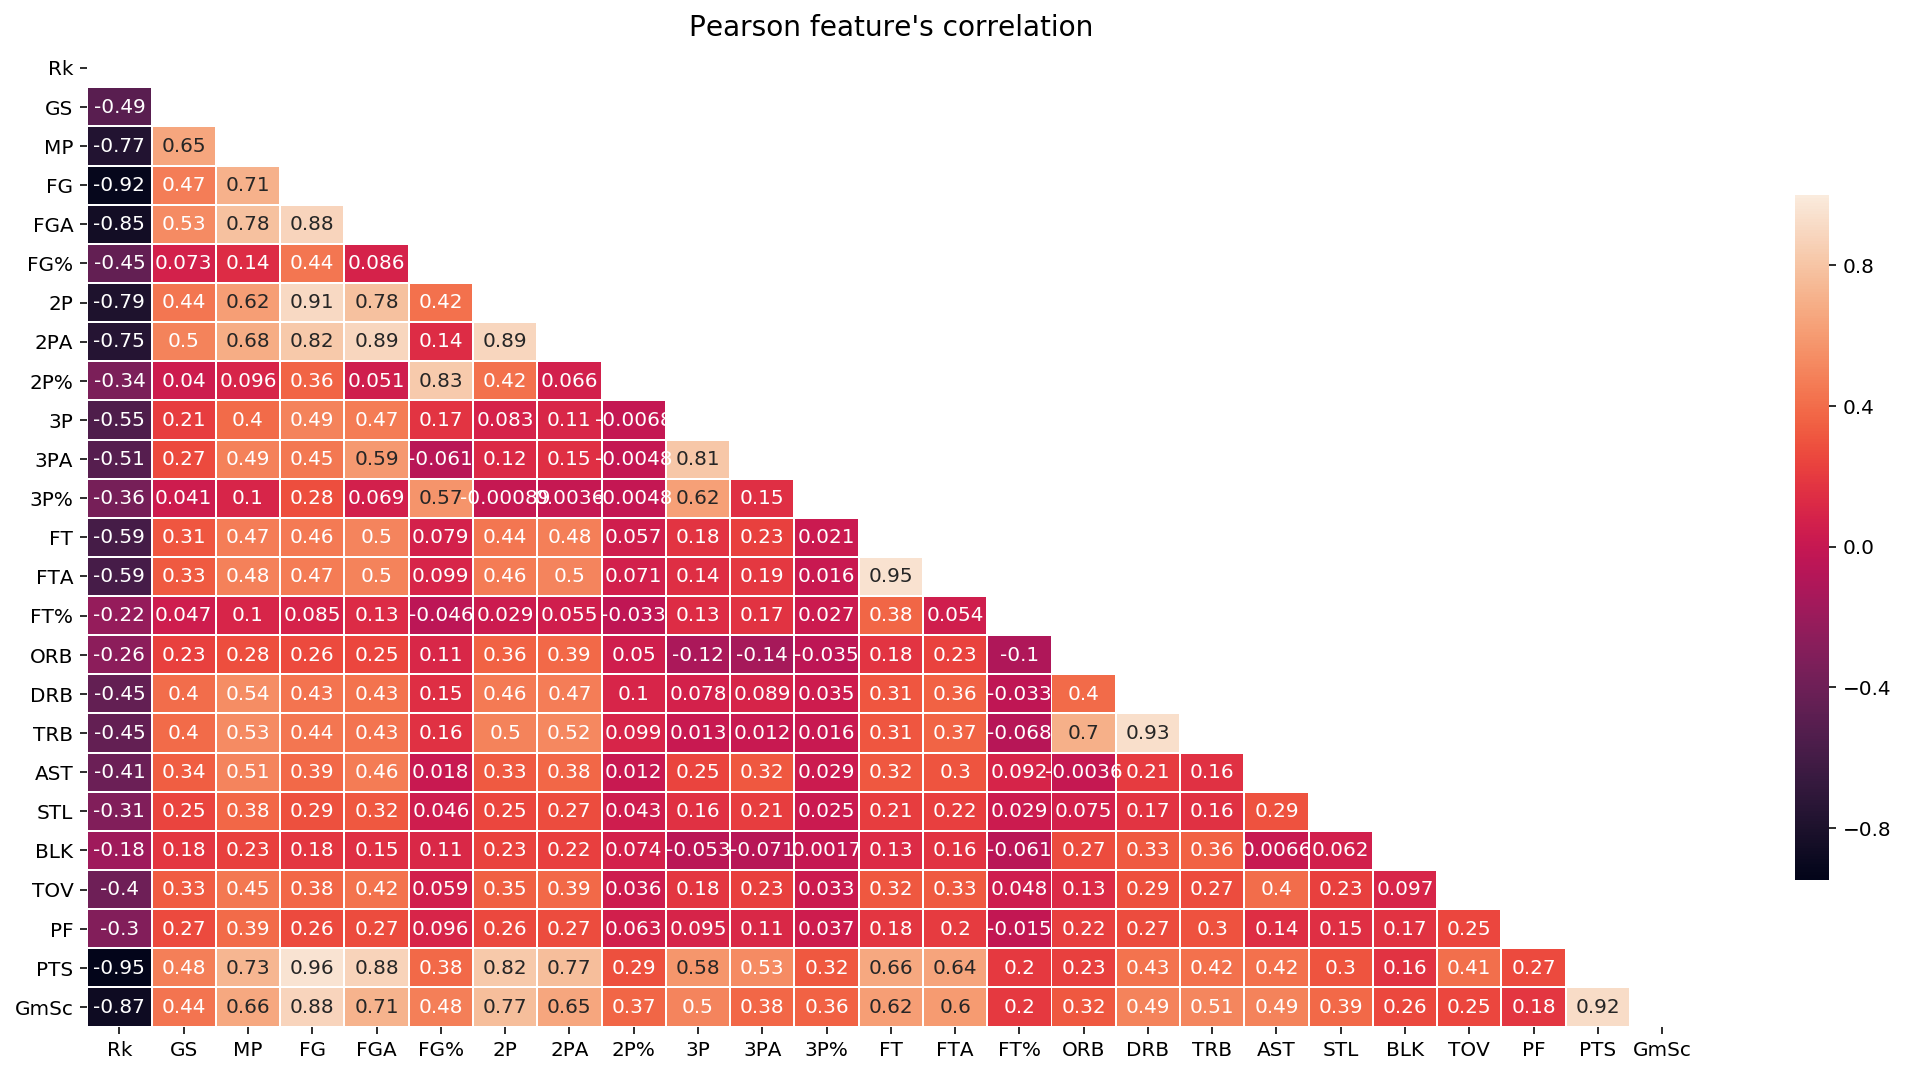

In [14]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 9))
plt.title("Pearson feature's correlation",fontsize=14)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr, mask=mask, linewidths=.5, cbar_kws={"shrink": .7},annot=True)


plt.savefig('features_corr_pearson.png')
plt.show()

In [15]:
df_corr_Spear = df.corr(method='spearman') #Spearman correlation

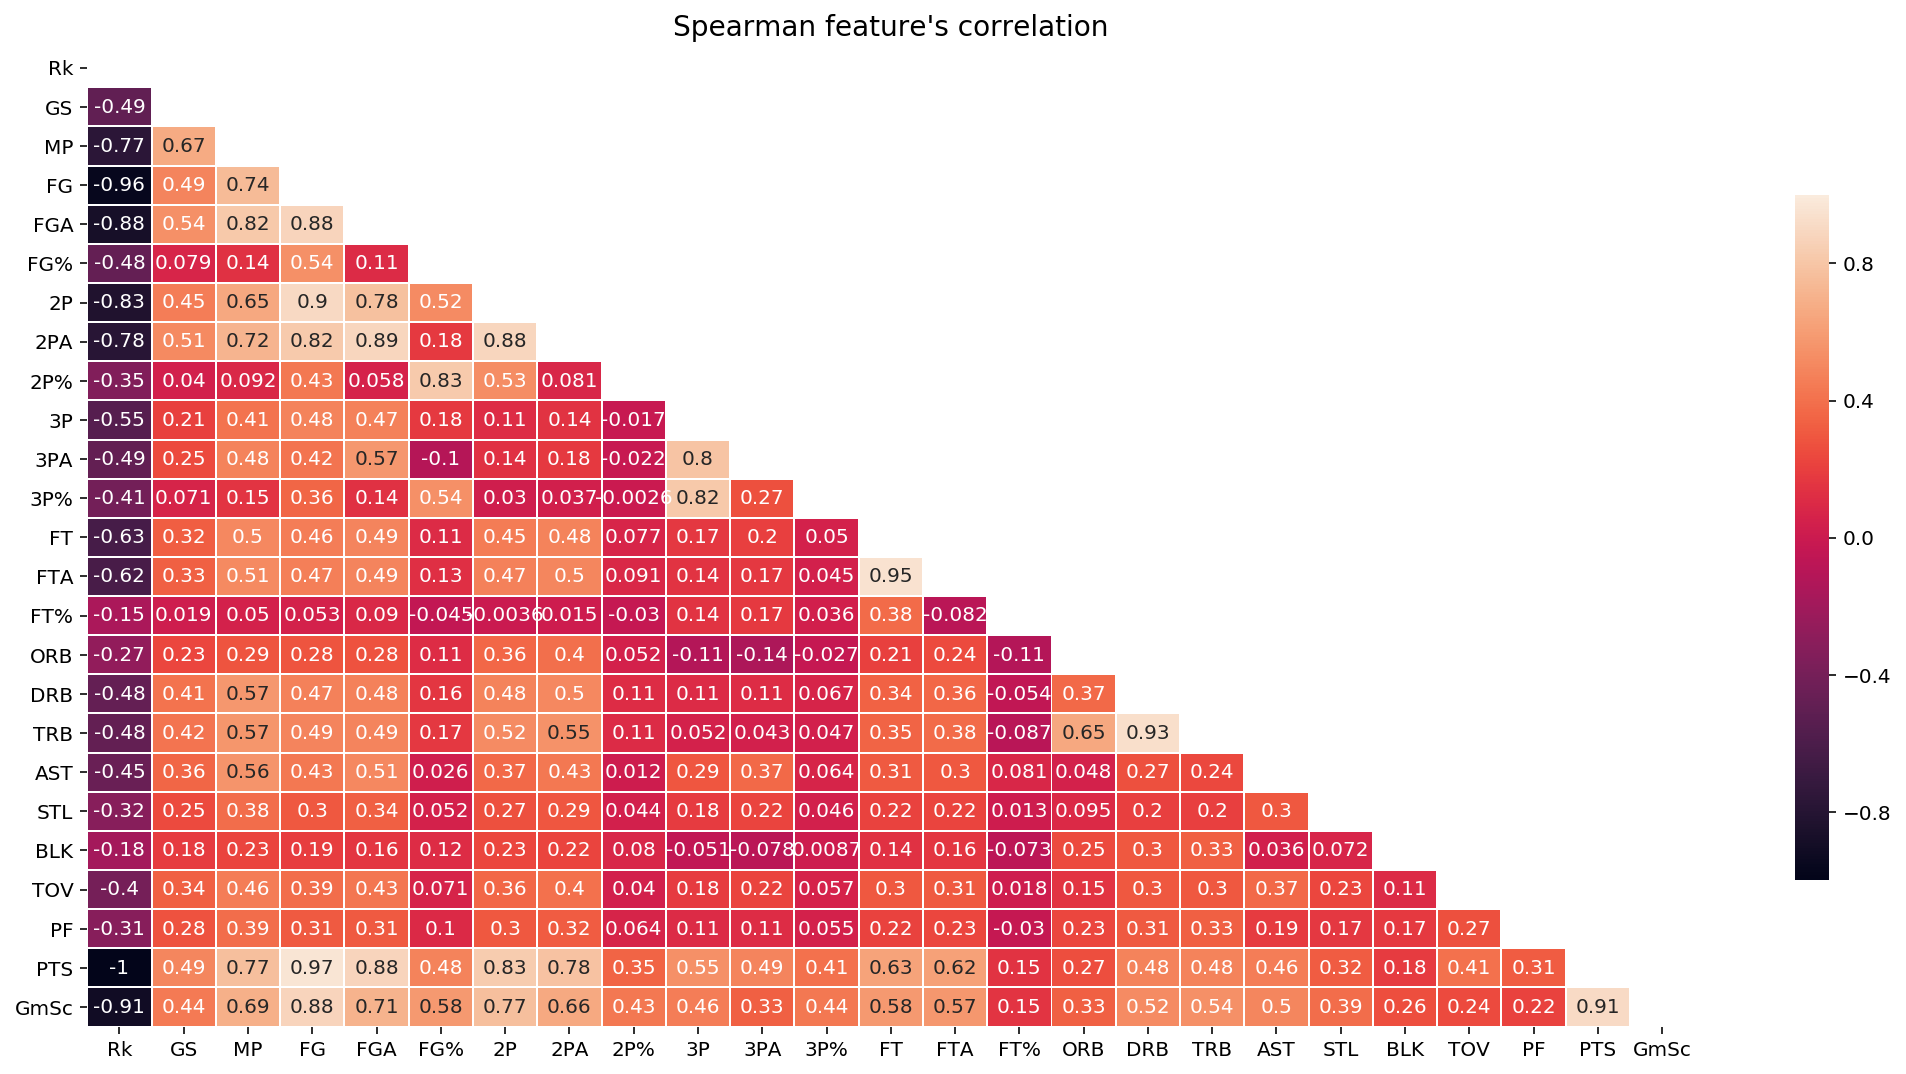

In [16]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_corr_Spear, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 9))
plt.title("Spearman feature's correlation",fontsize=14)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_corr_Spear, mask=mask, linewidths=.5, cbar_kws={"shrink": .7},annot=True)

plt.savefig('features_corr_spearman.png')
plt.show()

### The correlation between minutes played 'MP' and points is:
### Pearson = 0.73
### Spearman = 0.77

### Other feature might be interesting to check is if the player started the game 'GS'
### Pearson = 0.48
### Spearman = 0.49

# XGboost regression model

In [23]:
import xgboost as xgb
import graphviz
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score

In [3]:
df = pd.read_csv('df_Basketball.csv')
pd.set_option('display.max_columns', None)

In [4]:
df

,Rk,Player,Age,Pos,Date,Tm,Location,Opp,Result,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1,Devin Booker\bookede01,20-145,G,2017-03-24,PHO,@,BOS,L,1,45,21,40,0.525,17,29,0.586,4,11,0.364,24,26,0.923,2,6,8,6,3,1,5,3,70,54.5
1,2,Carmelo Anthony\anthoca01,29-240,F,2014-01-24,NYK,vs,CHA,W,1,39,23,35,0.657,17,24,0.708,6,11,0.545,10,10,1.000,1,12,13,0,0,0,0,1,62,50.6
2,3,LeBron James\jamesle01,29-063,F-G,2014-03-03,MIA,vs,CHA,W,1,41,22,33,0.667,14,23,0.609,8,10,0.800,9,12,0.750,3,4,7,4,0,0,2,2,61,48.8
3,4,Kobe Bryant\bryanko01,37-234,G-F,2016-04-13,LAL,vs,UTA,W,1,42,22,50,0.440,16,29,0.552,6,21,0.286,10,12,0.833,0,4,4,4,1,1,2,1,60,36.3
4,5,James Harden\hardeja01,28-157,G,2018-01-30,HOU,vs,ORL,W,1,46,19,30,0.633,14,16,0.875,5,14,0.357,17,18,0.944,2,8,10,11,4,1,5,2,60,56.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129916,129917,Ivica Zubac\zubaciv01,20-361,C,2018-03-14,LAL,@,GSW,L,0,6,0,2,0.000,0,2,0.000,0,0,NaN,0,2,0.000,0,3,3,0,0,0,0,0,0,-1.3
129917,129918,Ivica Zubac\zubaciv01,20-325,C,2018-02-06,LAL,vs,PHO,W,0,1,0,1,0.000,0,1,0.000,0,0,NaN,0,0,NaN,0,0,0,0,0,1,0,0,0,0.0
129918,129919,Ivica Zubac\zubaciv01,20-356,C,2018-03-09,LAL,@,DEN,L,0,9,0,4,0.000,0,4,0.000,0,0,NaN,0,0,NaN,2,3,5,0,0,1,0,2,0,-0.6
129919,129920,Ivica Zubac\zubaciv01,20-227,C,2017-10-31,LAL,vs,DET,W,0,2,0,2,0.000,0,2,0.000,0,0,NaN,0,0,NaN,1,0,1,0,0,0,1,1,0,-2.1


## Minutes played as feature for points prediction

In [41]:
# training data, feature to_frame returns a DF version of the values for XGBoost
X = df.MP.to_frame()

# target variable
y = df.PTS

# create a Data matrix for cross validation in XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'learning_rate': 0.2,'alpha': 10}
#                 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=24)

In [73]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
24,5.335778,0.003558,5.339713,0.014263
25,5.335697,0.003561,5.339650,0.014252
26,5.335643,0.003576,5.339610,0.014228
27,5.335612,0.003560,5.339588,0.014222
28,5.335577,0.003561,5.339578,0.014230


In [72]:
print((cv_results["test-rmse-mean"]).tail(1))

28    5.339578
Name: test-rmse-mean, dtype: float64


## Game started as feature for points prediction

In [74]:
# training data, feature to_frame returns a DF version of the values for XGBoost
X = df.GS.to_frame()

# target variable
y = df.PTS

# create a Data matrix for cross validation in XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'learning_rate': 0.2,'alpha': 10}
#                 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=24)

In [76]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
31,6.938075,0.004210,6.938184,0.016969
32,6.938034,0.004207,6.938209,0.016944
33,6.938111,0.004284,6.938181,0.016958
34,6.938074,0.004263,6.938183,0.016959
35,6.938084,0.004263,6.938180,0.016962


In [77]:
print((cv_results["test-rmse-mean"]).tail(1))

35    6.93818
Name: test-rmse-mean, dtype: float64


## Both features for points predictions

In [5]:
# training data, feature to_frame returns a DF version of the values for XGBoost
X = df[['MP','GS']]

# target variable
y = df.PTS

# create a Data matrix for cross validation in XGBoost
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:squarederror",'learning_rate': 0.2,'alpha': 10}
#                 'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=24)

In [6]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
23,5.329099,0.003562,5.334717,0.014563
24,5.328965,0.003565,5.334611,0.014532
25,5.328879,0.003570,5.334564,0.014530
26,5.328815,0.003560,5.334535,0.014508
27,5.328791,0.003564,5.334519,0.014491


In [7]:
print((cv_results["test-rmse-mean"]).tail(1))

27    5.334519
Name: test-rmse-mean, dtype: float64


In [10]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=30)

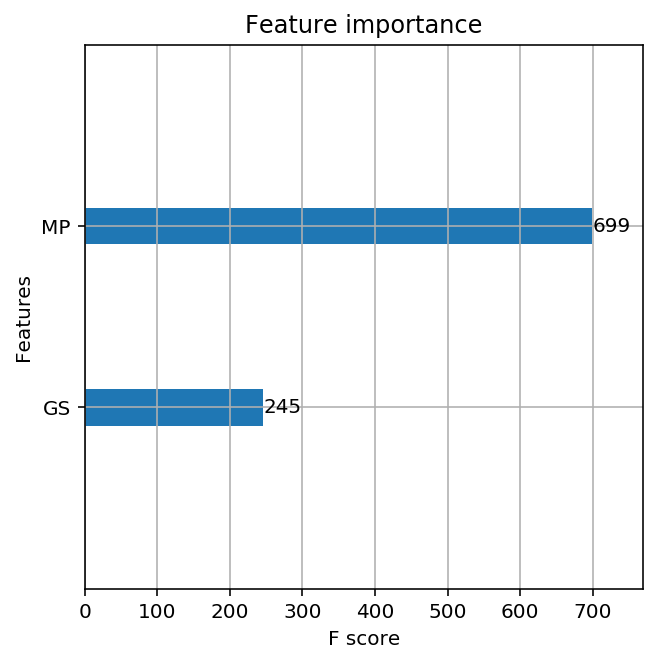

In [20]:
xgb.plot_importance(xg_reg)

plt.savefig('feature_importance_PTS.png')
plt.show()

---

Minutes played can be used to predict the total points a given player wil score. 
On way to obtain the numer of minutes they will play, since we don't actually have that number, is to obtain the mean of the previous N games they have played.

First, need to filter the players involved in a given match, probably only the ones involved in the most recent years

---

In [35]:
# sort the data by Date
df_sort_date = df.sort_values(by=['Date'],ascending=False)

#reseting the index of df
df_sort_date = df_sort_date.reset_index(drop=True)

## Teams

In [45]:
teams_set = set(df_sort_date.Tm)
print(f'There are {len(teams_set)} teams in data frame.')

There are 31 teams in data frame.


## Filtering for a match

In [50]:
#Filtering the df for playing teams
tm1 = 'NYK'
tm2 = 'CHI'

if (tm1 not in teams_set) | (tm2 not in teams_set):
    print("Team not found")
else:
    print("Teams found in data")

Teams found in data


In [51]:
#filter the data frame with teams conditional, result is a DF just for the match between tm1 and tm2
game_df = df_sort_date[((df_sort_date['Tm'] == tm1) & (df_sort_date['Opp'] == tm2)) |((df_sort_date['Tm'] == tm2) & (df_sort_date['Opp'] == tm1))]

In [58]:
# change column type to date time
game_df.Date = pd.to_datetime(game_df.Date)

/Users/ciro/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [72]:
# create a column with Year
game_df['Year'] = game_df.Date.dt.year

/Users/ciro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [68]:
# the most recent year the match has been played
recent_year = game_df.Date.iloc[0].year
recent_year

2018

In [74]:
# new DF containing only the matches played in the most recent year
recent_game_df = game_df[game_df['Year'] == recent_year]

In [76]:
recent_game_df.shape

(42, 34)

## Players


In [82]:
# the list of players is created from the DF containing just the matches played in the most recent 
# to avoid getting pleyers from other seasons
players_list = list(set(recent_game_df.Player))
print(f'There are {len(players_list)} different players in data.')

There are 30 different players in data.


In [85]:
# testing to obtain the mean of MP of last 10 games for each player

pl1 = players_list[4]

MP_mean_10g = df_sort_date[df_sort_date.Player == pl1].iloc[0:10].MP.mean()

In [104]:
# creating a list with all the players involved in the last year games and their corresponding mean of MP on their 
# last ever 10 matches
player_MP_list = []
for pl in players_list:
    # using the DF sorted by date to obtain the most recent played matches of every player
    mean10 = df_sort_date[df_sort_date.Player == pl].iloc[0:10].MP.mean()
    player_MP_list.append([pl,mean10])

In [105]:
player_MP_list

[['Ron Baker\\bakerro01', 10.5],
 ['Kris Dunn\\dunnkr01', 29.0],
 ['Denzel Valentine\\valende01', 25.4],
 ["Kyle O'Quinn\\oquinky01", 22.9],
 ['Cameron Payne\\payneca01', 25.7],
 ['Justin Holiday\\holidju01', 23.4],
 ['Noah Vonleh\\vonleno01', 23.6],
 ['Paul Zipser\\zipsepa01', 15.5],
 ['Jerian Grant\\grantje02', 24.1],
 ['Jarrett Jack\\jackja01', 16.6],
 ['Courtney Lee\\leeco01', 25.8],
 ['Lance Thomas\\thomala01', 19.5],
 ['Damyean Dotson\\dotsoda01', 18.2],
 ['Cristiano Felício\\feliccr01', 25.8],
 ['Michael Beasley\\beaslmi01', 26.3],
 ['Tim Hardaway\\hardati02', 33.2],
 ['Isaiah Hicks\\hicksis01', 14.0],
 ['Lauri Markkanen\\markkla01', 25.0],
 ['Frank Ntilikina\\ntilila01', 28.7],
 ['Enes Kanter\\kanteen01', 25.5],
 ['Robin Lopez\\lopezro01', 19.0],
 ['David Nwaba\\nwabada01', 28.0],
 ['Troy Williams\\willitr02', 18.6],
 ['Luke Kornet\\kornelu01', 20.7],
 ['Kristaps Porziņģis\\porzikr01', 29.0],
 ['Bobby Portis\\portibo01', 23.1],
 ['Emmanuel Mudiay\\mudiaem01', 19.0],
 ['Doug McD

In [102]:
# player_MP_list[0].append(133333)

In [42]:
# df_sort_date

,Rk,Player,Age,Pos,Date,Tm,Location,Opp,Result,GS,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,32856,Henry Ellenson\ellenhe01,21-088,F,2018-04-11,DET,@,CHI,W,0,28,5,10,0.500,3,7,0.429,2,3,0.667,2,2,1.000,0,10,10,2,1,0,1,3,14,12.2
1,8956,Luke Kornet\kornelu01,22-270,F,2018-04-11,NYK,@,CLE,W,0,28,9,14,0.643,5,7,0.714,4,7,0.571,1,1,1.000,0,3,3,2,1,1,3,4,23,16.2
2,95940,Chinanu Onuaku\onuakch01,21-161,F-C,2018-04-11,HOU,@,SAC,L,0,22,2,5,0.400,2,5,0.400,0,0,NaN,0,0,NaN,1,3,4,1,0,0,3,4,4,-1.0
3,49920,Bobby Portis\portibo01,23-060,F,2018-04-11,CHI,vs,DET,L,0,22,5,13,0.385,4,8,0.500,1,5,0.200,0,2,0.000,1,7,8,0,1,0,3,0,11,3.9
4,96170,London Perrantes\perralo01,23-190,G,2018-04-11,CLE,vs,NYK,L,0,33,1,7,0.143,1,6,0.167,0,1,0.000,2,2,1.000,1,1,2,0,2,1,0,2,4,2.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129916,24729,Chris Bosh\boshch01,29-219,F-C,2013-10-29,MIA,vs,CHI,W,1,31,6,11,0.545,5,9,0.556,1,2,0.500,3,4,0.750,1,5,6,0,0,3,1,3,16,12.4
129917,81590,Kyle O'Quinn\oquinky01,23-217,F-C,2013-10-29,ORL,@,IND,L,0,14,3,7,0.429,3,7,0.429,0,0,NaN,0,0,NaN,0,4,4,0,0,3,1,2,6,3.8
129918,94844,Ian Mahinmi\mahinia01,26-358,C,2013-10-29,IND,vs,ORL,W,0,17,0,1,0.000,0,1,0.000,0,0,NaN,4,6,0.667,1,2,3,0,0,2,2,5,4,1.2
129919,111811,Ronnie Price\pricero01,30-130,G,2013-10-29,ORL,@,IND,L,0,9,1,2,0.500,1,2,0.500,0,0,NaN,0,0,NaN,0,1,1,3,0,0,0,2,2,2.6
